#### Reminder. ECDF

In [1]:
import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

#### Importing libraries & Loading dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
df = pd.read_table(r'../input/think-stats-dataset/Speed of light.txt', sep = ',')
df = df.dropna()
speed = df['velocity of light in air (km/s)']

## 1. Generating bootstrap replicates
In the prequel to this course we computed summary statistics of measurements, including the `mean, median, and standard deviation`. 

**But** remember, we need to think **probabilistically**. 
### 1.1. Theory.
What if we acquired the data again? Would we get the same `mean`? The same `median`? The same `standard deviation`? 

Probably not. In `inference` problems, it is rare that we are interested in the result from a single experiment or data acquisition. We want to say something more general.

#### Michelson's speed of light measurements
Michelson was not interested in what the measured speed of light was in the specific 100 measurements conducted in the summer of 1879. He wanted to know what the speed of light actually is. 

Statistically speaking, that means he wanted to know what speed of light he would observe if he did the experiment over and over again an infinite number of times. Unfortunately, actually repeating the experiment lots and lots of times is just not possible. But, as hackers, we can simulate getting the data again.

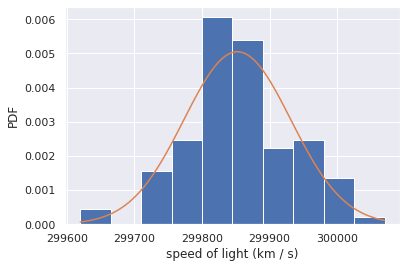

In [3]:
pi, muy, sigma = np.pi, np.mean(speed), np.std(speed)
x_pdf = np.linspace(min(speed), max(speed), 101)
y_pdf = np.exp(-(x_pdf - muy)**2 / (2*sigma**2)) / (np.sqrt(2*pi)*sigma)
plt.hist(speed, density = True)
plt.plot(x_pdf, y_pdf)
plt.xlabel('speed of light (km / s)')
plt.ylabel('PDF')
plt.show()

#### Resampling an array
The idea is that we resample the data we have and recompute the summary statistic of interest, say the mean. To resample an array of measurements, we randomly select one entry and store it. Importantly, we replace the entry in the original array, or equivalently, we just don't delete it. This is called sampling with replacement.

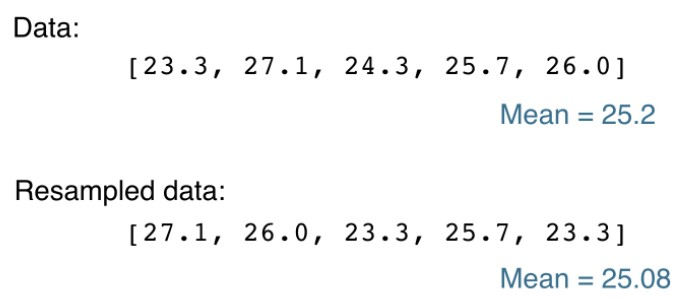

In [4]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

Then, we then randomly select another one and store it. We do this `n` times, where `n` is the total number of measurements, five in this case. We then have a resampled array of data. Using this new resampled array, we compute the summary statistic and store the result. Resampling the speed of light data is as if we repeated Michelson's set of measurements.

#### Mean of resampled Michelson measurements
We do this over and over again to get a large number of summary statistics from resampled data sets. We can use these results to plot an ECDF, for example, to get a picture of the probability distribution describing the summary statistic. This process is an example of bootstrapping, which more generally is the use of resampled data to perform statistical inference. 

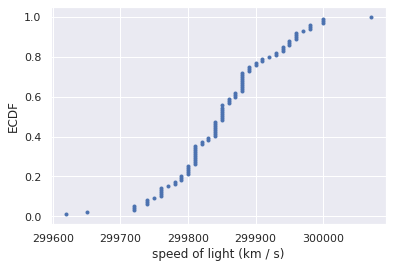

In [5]:
x, y = ecdf(speed)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('speed of light (km / s)')
plt.ylabel('ECDF')
plt.show()

#### Bootstrap sample
To make sure we have our terminology down, each resampled array is called `boostrap sample`.

A bootstrap replicate is the value of the summary statistic computed from the bootstrap sample. The name makes sense; it's a simulated replica of the original data acquired by bootstrapping. Let's look at how we can generate a bootstrap sample and compute a bootstrap replicate from it using `Python`. We will use Michelson's measurements of the speed of light.
#### Resampling engine: np.random.choice()
First, we need a function to perform the resampling. The `Numpy function` `random.choice` provides this functionality.

In [6]:
import numpy as np
np.random.choice([1,2,3,4,5], size = 5)

array([5, 1, 3, 1, 3])

Conveniently, like many of the other functions in the Numpy random module, it has a size keyword argument, which allows us to specify how many samples we want to take out of the array. Notice that it chose the number five three times; the function does not delete an entry when it samples it out of the array. Now, we can draw 100 samples out of the Michelson speed of light data.
#### Computing a bootstrap replicate
This is a bootstrap sample, since there were 100 data points and we are choosing 100 of them with replacement. 

In [7]:
bs_sample = np.random.choice(speed, size = 100)

Now that we have a bootstrap sample, we can compute a bootstrap replicate. We can pick whatever summary statistic we like. We'll compute the mean, median, and standard deviation.

In [8]:
bs_sample = np.random.choice(speed, size = 100)
print(' Mean = %s\n Median = %s \n standard_deviation = %s'%(np.mean(bs_sample), np.median(bs_sample), np.std(bs_sample)))

 Mean = 299853.1
 Median = 299840.0 
 standard_deviation = 75.83791927525438


It's as simple as treating the bootstrap sample as though it were a data set.
### 1.2. PRACTICE.
#### Exercise 1.2.1. Getting the terminology down
Getting tripped up over terminology is a common cause of frustration in students. Unfortunately, you often will read and hear other data scientists using different terminology for bootstrap samples and replicates. This is even more reason why we need everything to be clear and consistent for this course. So, before going forward discussing bootstrapping, let's get our terminology down. If we have a data set with $n$ repeated measurements, a **bootstrap sample** is an array of length $n$ that was drawn from the original data with replacement. What is a 
**bootstrap replicate**?
#### Answers.
**A single value of a statistic computed from a bootstrap sample.**

#### Exercise 1.2.2. Bootstrapping by hand
To help you gain intuition about how bootstrapping works, imagine you have a data set that has only three points, `[-1, 0, 1]`. How many unique bootstrap samples can be drawn (e.g., `[-1, 0, 1]` and `[1, 0, -1]` are unique), and what is the maximum mean you can get from a bootstrap sample?

#### Answers.
- There are $3^3 = 27$ total bootstrap samples, and one of them, `[1,1,1]` has a mean of `1`. 
- Conversely, `7` of them have a mean of zero, such as `[1, -1, 0], [0, 0, 0], [1, 0, -1], etc`.

#### Exercise 1.2.3. Visualizing bootstrap samples
In this exercise, you will generate bootstrap samples from the set of annual `rainfall` data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an `ECDF`, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

#### SOLUTION

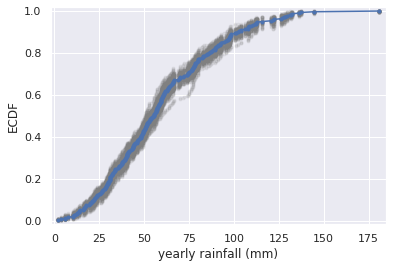

In [10]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rain_fall, size=len(rain_fall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rain_fall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

## 2. Bootstrap confidence intervals
### 2.1. Theory.
Since we will repeat the replicates over and over again, we can write a function to generate a bootstrap replicate.
#### Bootstrap replicate function
We will call the function `bootstrap_replicate_1d`, since it works on one-dimensional arrays. 

- We pass in the data and also a function that computes the statistic of interest. We could pass `np.mean` or `np.median`, for example. 

- Generating a replicate takes two steps. 
> First, we choose entries out of the data array so that the bootstrap sample has the same number of entries as the original data. 

> Then, we compute the statistic using the specified function. If we call the function, we get a bootstrap replicate. And we can do this over and over again.

In [11]:
def bootstrap_replicate_1d(data, func):
    """Generare boostrap replicate of 1D-data"""
    bs_sample = np.random.choice(data, size = len(data))
    return func(bs_sample)
bootstrap_replicate_1d(speed, np.mean)

299840.50505050505

So, how do we do it over and over again?

In [12]:
bootstrap_replicate_1d(speed, np.mean)

299844.9494949495

#### Many bootstrap replicates
With a for loop! 
- First, we have to initialize an array to store our bootstrap replicates. We will make 10,000 replicates, so we use `np.empty` to create an empty array. 
- Next, we write a for loop to generate a replicate and store it in the `bs_replicates` array. 

In [13]:
bs_replicate = np.empty(10000)
for i_th in range(10000):
    bs_replicate[i_th] = bootstrap_replicate_1d(speed, np.mean)

#### Plotting a histogram of bootstrap replicates
Now that we have the replicates, we can make a histogram to see what we might expect to get for the mean of repeated measurements of the speed of light. 

Note that we use the normed (or density) equals True keyword argument. This sets the height of the bars of the histogram such that the total area of the bars is equal to one. This is called normalization, and we do it so that the histogram approximates a probability density function.

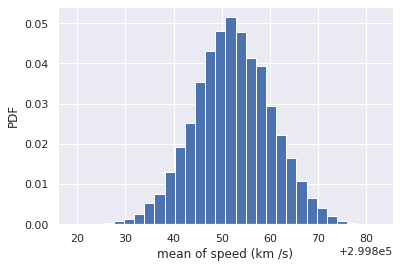

In [14]:
plt.hist(bs_replicate, bins = 30, density = True)
plt.xlabel('mean of speed (km /s)')
plt.ylabel('PDF')
plt.show()

#### Bootstrap estimate of the mean
You'll recall from the prequel to this course that the area under the PDF gives a probability. So, we have computed the approximate PDF of the mean speed of light we would expect to get if we performed the measurements again. Now we're thinking probabilistically! If we repeat the experiment again and again, we are likely to only see the sample mean vary by about 30 km/s. Now it is useful to summarize this result without having to resort to a graphical method like a histogram. 
#### Confidence interval of a statistic
To do this, we will compute the `95%` confidence interval of the mean.
- The `p%` confidence interval is defined as follows. If we repeated measurements over and over again, `p%` of the observed values would lie within the `p%` confidence interval. 
- In our case, if we repeated the 100 measurements of the speed of light over and over again, `95%` of the sample means would lie within the 95% confidence interval.

#### Bootstrap confidence interval
By doing bootstrap replicas, we just "repeated" the experiment over and over again.

So, we just use np dot percentile to compute the 2-point-5th and `97-point-5th` percentiles to get the `95%` confidence interval. This is indeed commensurate with what we see in the histogram.

In [15]:
conf_int = np.percentile(bs_replicate, [2.5, 97.5])
conf_int

array([299836.66666667, 299868.28282828])

### 2.2. PRACTICE
#### Exercise 2.2.1. Generating many bootstrap replicates
The function bootstrap_replicate_1d() from the video is available in your namespace.

Now you'll write another function, `draw_bs_reps(data, func, size=1)`, which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.
#### SOLUTION

In [16]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#### Exercise 2.2.2. Bootstrap replicates of the mean and the SEM
In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the `Sheffield Weather Station` could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the `PDF` as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) 

The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, `sem = np.std(data) / np.sqrt(len(data))`.

Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.
#### SOLUTION

1.802164729080208
1.8108463800912393


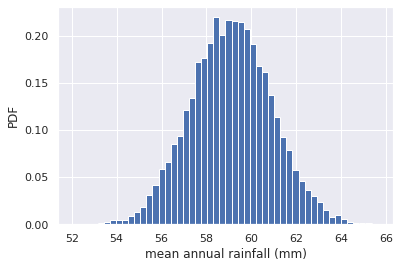

In [17]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rain_fall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rain_fall) / np.sqrt(len(rain_fall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

#### Exercise 2.2.3. Confidence intervals of rainfall data
A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?
#### SOLUTION

In [18]:
np.percentile(bs_replicates, [2.5, 97.5])

array([55.62364167, 62.711775  ])

#### Exercise 2.2.4. Bootstrap replicates of other statistics
We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates!

In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.
#### SOLUTION,

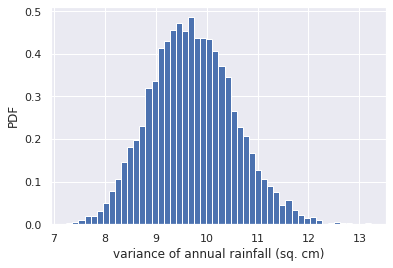

In [19]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rain_fall, np.var, size = 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins = 50, density = True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

#### Exercise 2.2.5. Confidence interval on the rate of no-hitters
Consider again the `inter-no-hitter` intervals for the modern era of baseball. 

In [20]:
df_baseball = pd.read_table(r'../input/think-stats-dataset/Major League Baseball no-hitters.txt', sep = ',')
no_hitter_times = df_baseball['date']

Generate 10,000 bootstrap replicates of the optimal parameter $\tau$. Plot a histogram of your replicates and report a 95% confidence interval.
#### SOLUTION.

95% confidence interval = [661.31962151 872.81762948] games


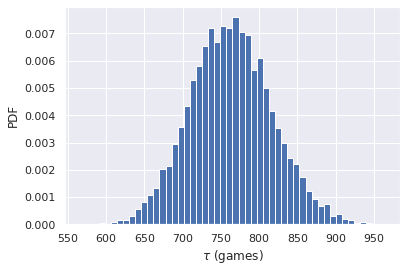

In [21]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(no_hitter_times, np.mean, size = 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## 3. Pairs bootstrap
### 3.1. Theory.
#### Nonparametric inference
When we computed bootstrap confidence intervals on summary statistics, we did so nonparametrically. By this, I mean that we did not assume any model underlying the data; the estimates were done using the data alone.
#### 2008 US swing state election results
When we performed a linear least squares regression, however, we were using a linear model, which has two parameters, the slope and intercept. This was a parametric estimate. The optimal parameter values we compute for our parametric model are like other statistics, in that we would get different values for them if we acquired the data again.

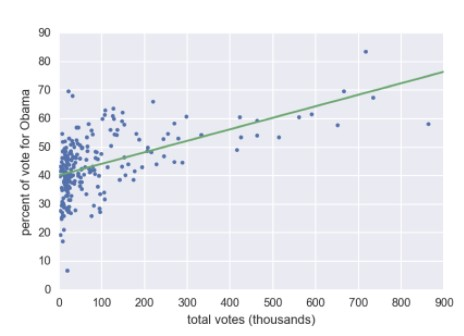

In [22]:
# Hinh minh hoa

We can perform bootstrap estimates to get confidence intervals on the slope and intercept as well. 

Remember: we need to think probabilistically. Let's consider the swing state election data from the prequel to this course.
- What if we had the election again, under identical conditions? 
- How would the slope and intercept change? 

This is kind of a tricky question; there are several ways to get bootstrap estimates of the confidence intervals on these parameters, each of which makes difference assumptions about the data. 

We will do a method that makes the least assumptions, called pairs bootstrap.
#### Pairs bootstrap for linear regression
Since we cannot resample individual data because each county has two variables associated with it, the vote share for Obama and the total number of votes, we resample pairs. 

For the election data, we could randomly select a given county, and keep its total votes and Democratic share as a pair. So our bootstrap sample consists of a set `(x,y)` pairs.

We then compute the slope and intercept from this pairs bootstrap sample to get the bootstrap replicates. You can get confidence intervals from many bootstrap replicates of the slope and intercept, just like before. 
#### Generating a pairs bootstrap sample
Because np dot random dot choice must sample a `1D array`, we will sample the indices of the data points. We can generate the indices of a NumPy array using the np dot arrange function. It give us an array of sequential integers. 

In [23]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

We then sample the indices with replacement. The bootstrap sample is generated by slicing out the respective values from the original data arrays. With these in hand, we can perform a linear regression using `np.polyfit` on the pairs bootstrap sample to get a bootstrap replicate.
#### Computing a pairs bootstrap replicate
If we compare the result to the linear regression on the original data, they are close, but not equal. As we have seen before, you can use many of these replicates to generate bootstrap confidence intervals for the slope and intercept using np dot percentile. 

You can also plot the lines you get from your bootstrap replicates to get a graphic idea how the regression line may change if the data were collected again. You will work through this whole procedure in the exercises

### 3.2. PRACTICES
#### Exercise 3.2.1. A function to do pairs bootstrap
As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using `np.polyfit()`.

We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of `x,y` data.
#### SOLUTION.

In [24]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        # Resample the indices inds.
        bs_inds = np.random.choice(inds, size=len(x))
        # Make new  and  arrays bs_x and bs_y using the the resampled indices bs_inds.
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        # Find slope & intercept for linear-regression
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, deg = 1)

    return bs_slope_reps, bs_intercept_reps

#### Exercise 3.2.2. Pairs bootstrap of literacy/fertility data
Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the `illiteracy/fertility` data. 

Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays `illiteracy` and `fertility`.
#### SOLUTION

[-0.05556688 -0.04440253]


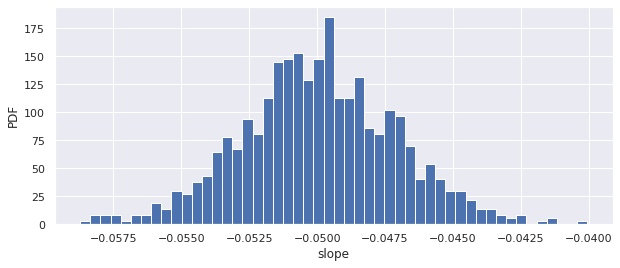

In [25]:
lit_fer_df = pd.read_table(r'../input/think-stats-dataset/Female literacy and fertility.txt', sep = ',')
illiteracy = lit_fer_df['female literacy']
fertility = lit_fer_df['fertility']

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size = 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.figure(figsize = (10, 4))
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

#### Exercise 3.2.3. Plotting bootstrap regressions
A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the `slope` and `intercept`. 

Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as `bs_slope_reps` and `bs_intercept_reps`).
#### SOLUTION.

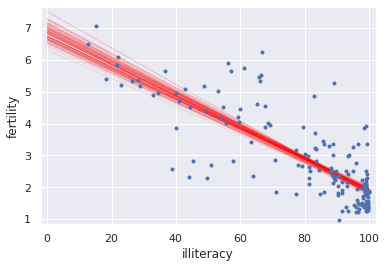

In [26]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker = '.', linestyle = 'none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()